# Data Training and Testing

In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn import tree, preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from tqdm import tqdm

from sklearn.metrics import \
    classification_report, \
    plot_confusion_matrix, \
    confusion_matrix, \
    roc_curve, \
    auc

sns.set_theme()

In [222]:
def load_data(path) -> pd.DataFrame:
    df = pd.read_csv(path)
    return df

def plot_ROC(y_test, y_pred, plt_config):    
        fpr, tpr, threshold = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=plt_config['figsize'])
        plt.title('ROC')
        plt.plot(fpr, tpr, 'b', label='ROC-AUC = %0.2f' % roc_auc)
        plt.plot([0,1], [0,1], 'y--', label='baseline')

        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc='best')
        plt.show()

def decisionTreeTrain(X_train, y_train, max_depth):
    clf = tree.DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    return clf

In [200]:
df = load_data('../csv_data/user_1.csv')

In [201]:
df

,timestamp,dist_s,angle_s,mean_dist,min_dist,view_dist,average_mouse_speed,useful,useless,aiming,shooting,moving,class
0,2022-04-17 20:58:59,628.077,230.35100,5764.60,5094.55,74.2955,0,0,1,0,0,0,0
1,2022-04-17 20:59:00,984.680,0.00000,NaN,NaN,74.2955,0,0,3,0,0,0,0
2,2022-04-17 20:59:01,1247.550,29.78360,5807.95,5296.89,64.6675,0,0,1,0,0,0,0
3,2022-04-17 20:59:02,1300.780,28.94940,5955.68,5187.03,81.9060,12,0,0,0,0,0,0
4,2022-04-17 20:59:03,1363.450,3.18005,7257.50,7221.94,80.5923,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17294,2022-04-18 02:47:57,1200.150,0.00000,2560.58,2416.79,83.2115,0,0,0,0,0,0,0
17295,2022-04-18 02:47:58,1266.950,0.00000,2746.02,2625.07,83.2115,0,0,0,0,0,0,0
17296,2022-04-18 02:47:59,1221.210,0.00000,2996.24,2868.48,83.2115,0,0,1,0,0,0,0
17297,2022-04-18 02:48:00,1228.330,0.00000,3231.47,3080.77,83.2115,0,0,1,0,0,0,0


<AxesSubplot:ylabel='Frequency'>

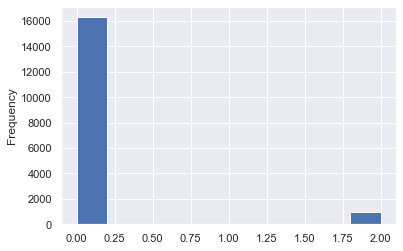

In [202]:
df['class'].plot.hist()

In [203]:
df = df.fillna(-10000)
# df = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
df = df.replace((np.inf, -np.inf), 0).reset_index(drop=True)

data_X = df.drop(columns = ['timestamp', 'class'])
data_y = df['class']

# data_y = data_y.replace(2, 1)

In [204]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3)

X_train

,dist_s,angle_s,mean_dist,min_dist,view_dist,average_mouse_speed,useful,useless,aiming,shooting,moving
13873,213.3150,16.948600,6612.620,6302.130,42.2208,0,2,3,0,0,1
2807,1056.5400,403.591000,2481.580,2459.240,155.2100,15,0,0,0,0,1
681,1346.9600,0.000000,932.117,851.184,119.9260,0,0,0,0,0,0
6078,294.8390,24.512200,-10000.000,-10000.000,-10000.0000,0,0,1,0,0,1
11819,246.5730,391.650000,-10000.000,-10000.000,-10000.0000,0,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
969,263.3020,421.352000,-10000.000,-10000.000,-10000.0000,13,1,0,0,0,1
183,100.1790,26.856100,-10000.000,-10000.000,-10000.0000,5,0,0,0,0,1
3845,164.0350,95.556500,-10000.000,-10000.000,-10000.0000,141,2,0,0,0,1
12943,91.0842,0.721194,-10000.000,-10000.000,-10000.0000,0,2,0,0,0,1


In [205]:
def scalar_normalize(X_train, X_test):
    min_max_scalar = preprocessing.MinMaxScaler()
    X_train_minmax = min_max_scalar.fit_transform(X_train)
    X_test_minmax = min_max_scalar.transform(X_test)
    X_train_scaled = preprocessing.scale(X_train_minmax)
    X_test_scaled = preprocessing.scale(X_test_minmax)
    X_train_normalized = preprocessing.normalize(X_train_scaled, norm='l2')
    X_test_normalized = preprocessing.normalize(X_test_scaled, norm='l2')
    return X_train_normalized, X_test_normalized

# X_train, X_test = scalar_normalize(X_train, X_test)

In [223]:
# model = KNeighborsClassifier(n_neighbors=7)
# model.fit(X_train, y_train)
model = decisionTreeTrain(X_train, y_train, max_depth=4)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4914
           1       0.72      0.53      0.61       276

    accuracy                           0.96      5190
   macro avg       0.85      0.76      0.80      5190
weighted avg       0.96      0.96      0.96      5190



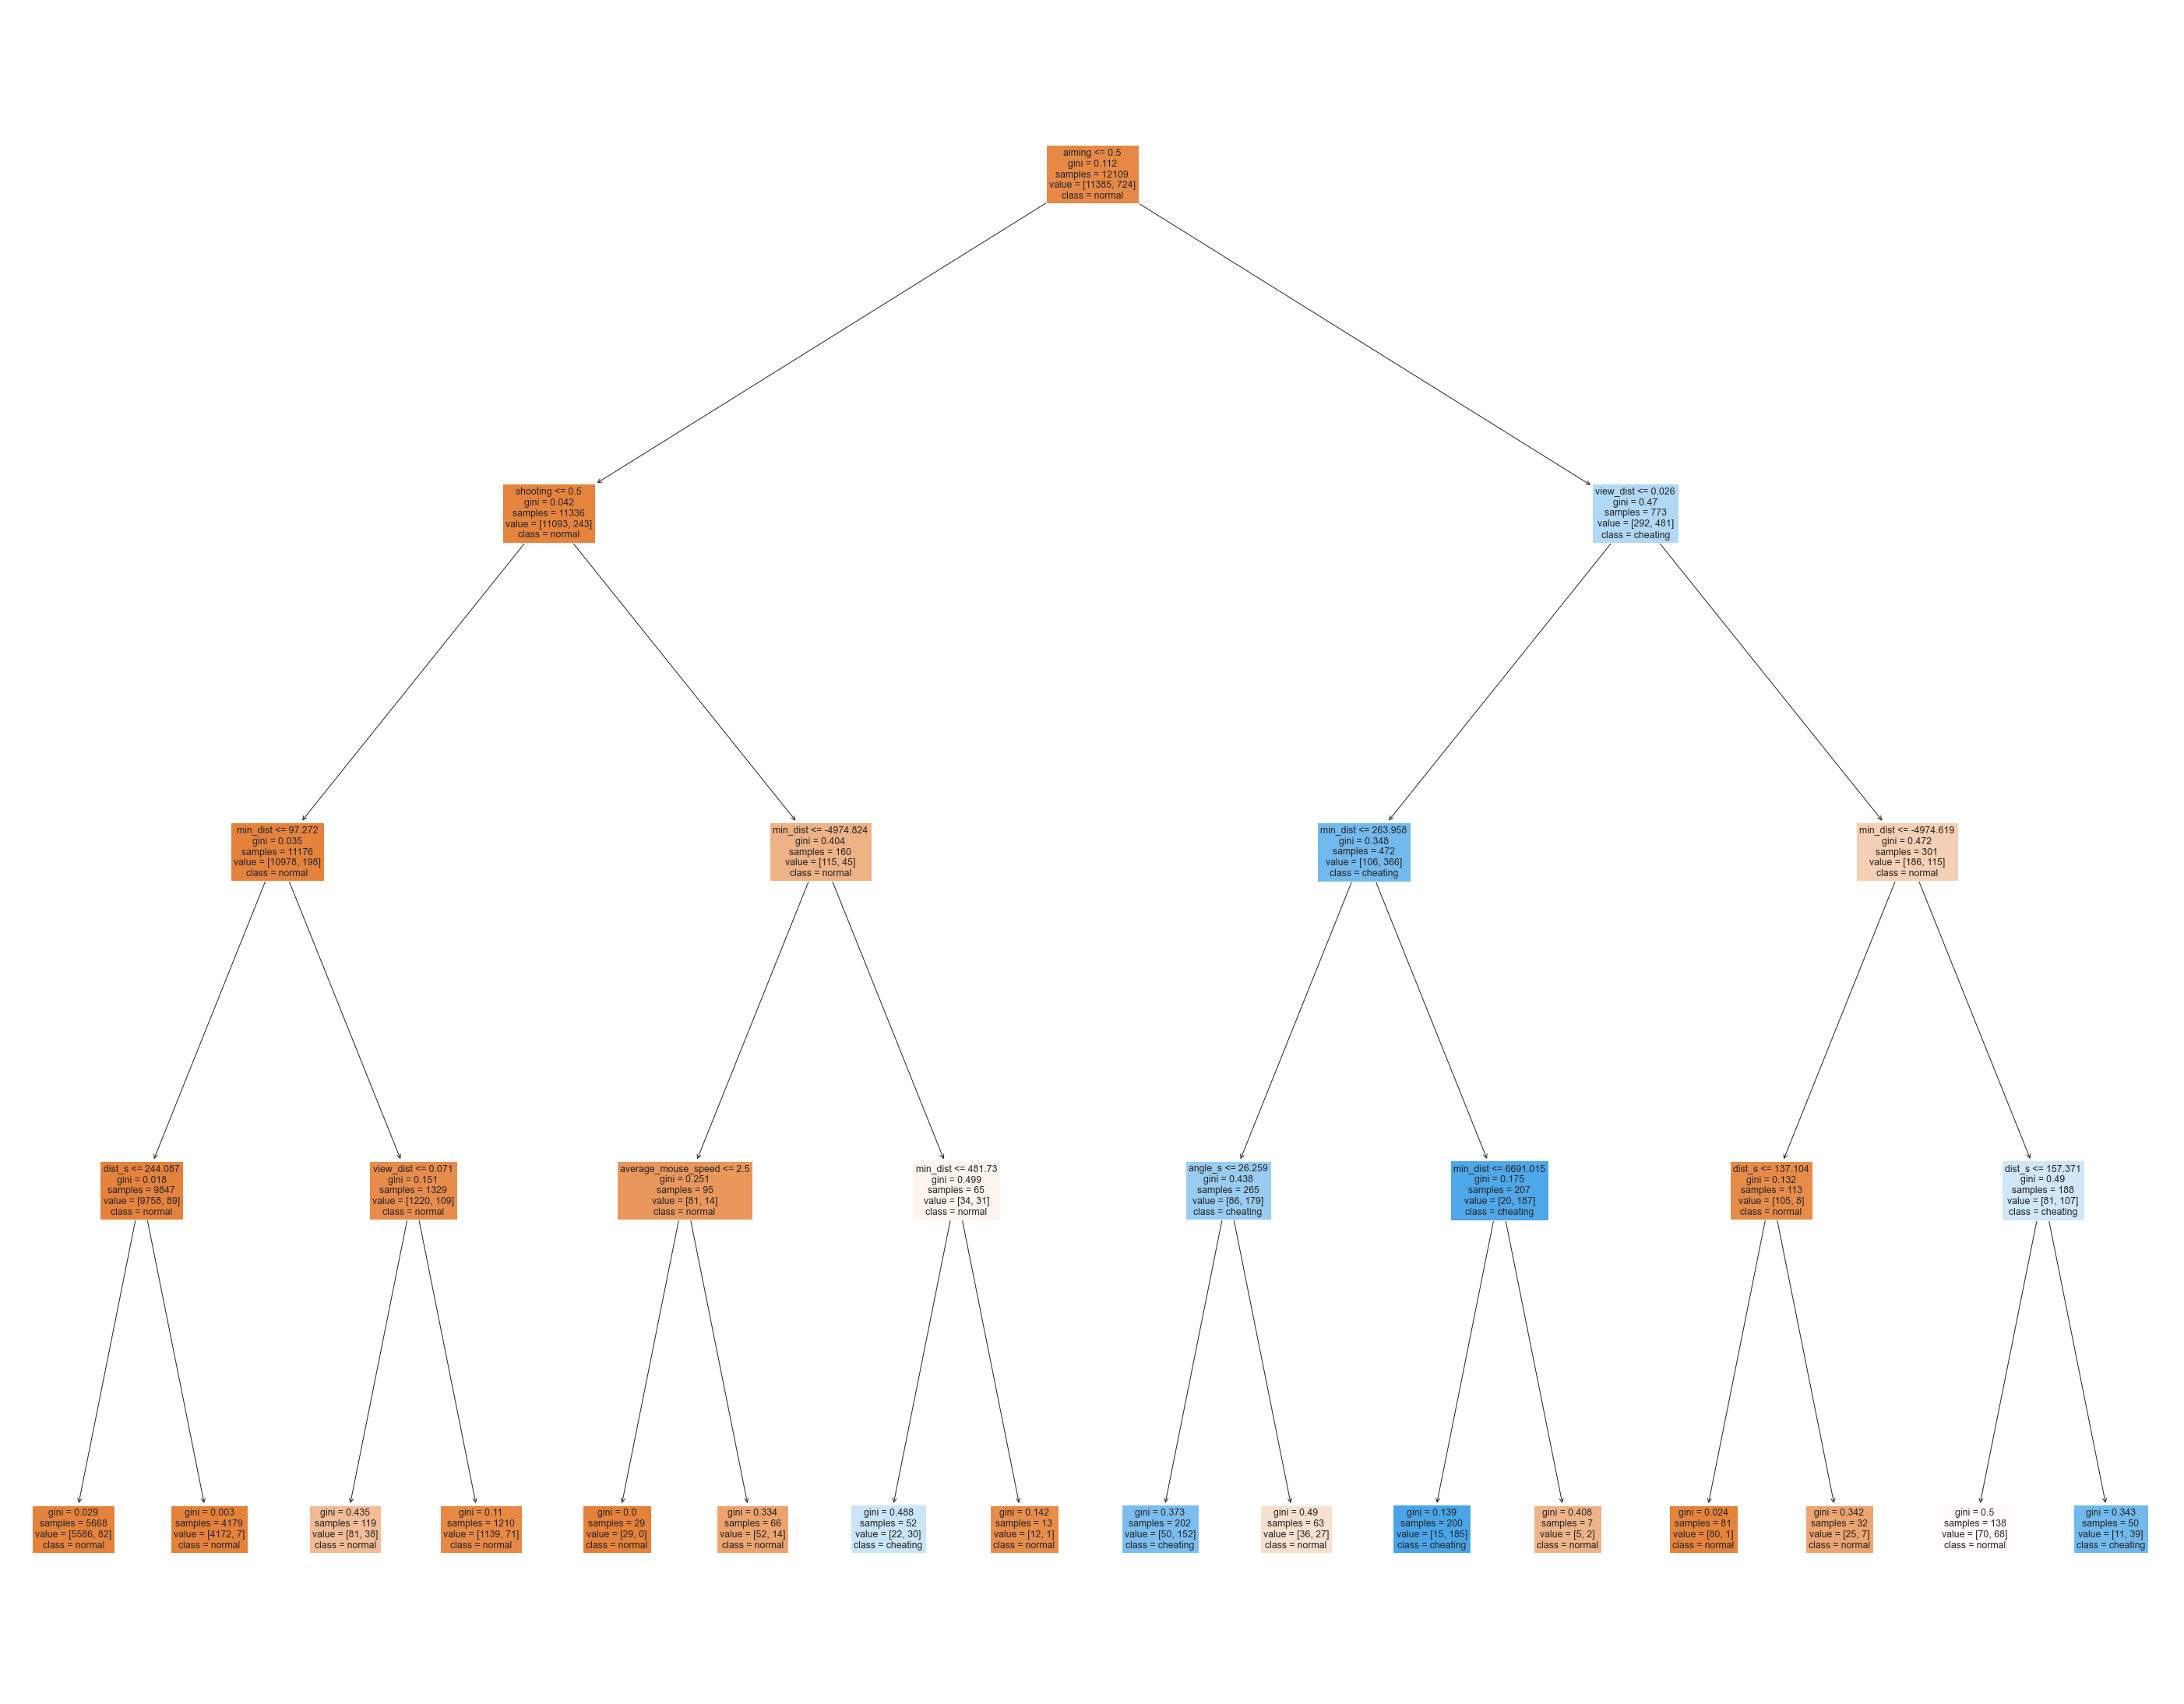

In [225]:
y_hat = model.predict(X_test)

print(classification_report(y_test, y_hat))

fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(model, feature_names=X_train.columns, \
    class_names = ['normal', 'cheating'], filled = True)

In [208]:
# try to do binary classification
data_X = data_X
binary_data_y = data_y.copy()
binary_data_y[binary_data_y>0] = 1

In [209]:
X_train, X_test, y_train, y_test = train_test_split(data_X, binary_data_y, test_size=0.3)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4914
           1       0.47      0.26      0.34       276

    accuracy                           0.94      5190
   macro avg       0.71      0.62      0.65      5190
weighted avg       0.93      0.94      0.94      5190



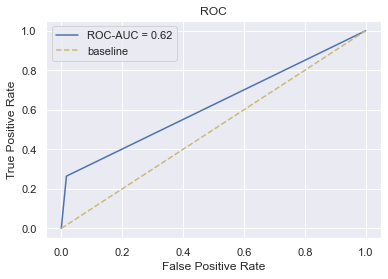

In [210]:
plt_config = {
    'figsize': (6, 4),
    # 'model': ad.mode + ' Detection'
}

plot_ROC(y_test, y_hat, plt_config)

In [250]:
# try SVM
svmclf = make_pipeline(preprocessing.StandardScaler(), SVC(kernel = 'rbf', gamma='auto', degree=1))
svmclf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(degree=1, gamma='auto'))])

In [251]:
y_hat = svmclf.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4914
           1       0.67      0.65      0.66       276

    accuracy                           0.96      5190
   macro avg       0.83      0.82      0.82      5190
weighted avg       0.96      0.96      0.96      5190

